# Gravothermal Evolution Analysis

This notebook analyzes the output from gravothermal evolution simulations, showing time evolution of key physical quantities at evenly spaced timesteps.

**Features:**
- Load simulation output files
- Select N evenly spaced snapshots in time
- Visualize radial profiles at selected times
- Track time evolution of central quantities

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set matplotlib style for better-looking plots
#plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Define Data Loading Function

Load simulation output and parse the time series data for all physical quantities.

In [2]:
def parse_output_file(filepath):
    """
    Parse the simulation output file and extract time series data.
    
    Parameters:
    -----------
    filepath : str or Path
        Path to the simulation output file
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'times': array of simulation times
        - 'steps': array of step numbers
        - 'r_data': list of radius arrays at each timestep
        - 'rho_data': list of density arrays
        - 'm_data': list of enclosed mass arrays
        - 'u_data': list of internal energy arrays
        - 'l_data': list of luminosity arrays
    """
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    # Find where data starts (after the header)
    data_start = 0
    for i, line in enumerate(lines):
        if "time, step, SIDM" in line:
            data_start = i + 1
            break
    
    # Parse the data section
    times = []
    steps = []
    r_data = []
    rho_data = []
    m_data = []
    u_data = []
    l_data = []
    
    i = data_start
    while i < len(lines):
        line = lines[i].strip()
        if not line:
            i += 1
            continue
        
        # Parse time and step
        parts = line.split()
        if len(parts) == 2:
            times.append(float(parts[0]))
            steps.append(int(parts[1]))
            
            # Read next 5 lines for r, rho, m, u, l
            i += 1
            if i < len(lines):
                r_data.append(np.fromstring(lines[i], sep=' '))
            i += 1
            if i < len(lines):
                rho_data.append(np.fromstring(lines[i], sep=' '))
            i += 1
            if i < len(lines):
                m_data.append(np.fromstring(lines[i], sep=' '))
            i += 1
            if i < len(lines):
                u_data.append(np.fromstring(lines[i], sep=' '))
            i += 1
            if i < len(lines):
                l_data.append(np.fromstring(lines[i], sep=' '))
        
        i += 1
    
    return {
        'times': np.array(times),
        'steps': np.array(steps),
        'r_data': r_data,
        'rho_data': rho_data,
        'm_data': m_data,
        'u_data': u_data,
        'l_data': l_data
    }

print("✓ Data loading function defined")

✓ Data loading function defined


## 3. Load Data and Select Timesteps

Specify the output file to analyze and the number of evenly spaced timesteps to display.

In [3]:
# ============ CONFIGURATION ============
# Modify these parameters as needed

# Path to the output file to analyze
output_file = "output/result_myrun.txt"

# Number of evenly spaced timesteps to display
N_timesteps = 5

# ========================================

# Load the data
print(f"Loading data from: {output_file}")
data = parse_output_file(output_file)

n_snapshots = len(data['times'])
print(f"✓ Loaded {n_snapshots} snapshots")
print(f"  Time range: {data['times'][0]:.6e} to {data['times'][-1]:.6e}")
print(f"  Step range: {data['steps'][0]} to {data['steps'][-1]}")

# Select N evenly spaced timesteps
if N_timesteps > n_snapshots:
    print(f"\nWarning: Requested {N_timesteps} timesteps but only {n_snapshots} available.")
    print(f"Using all {n_snapshots} timesteps instead.")
    selected_indices = np.arange(n_snapshots)
else:
    selected_indices = np.linspace(0, n_snapshots - 1, N_timesteps, dtype=int)

print(f"\n✓ Selected {len(selected_indices)} timesteps:")
for idx in selected_indices:
    print(f"  Snapshot {idx}: t = {data['times'][idx]:.6e}, step = {data['steps'][idx]}")

Loading data from: output/result_myrun.txt
✓ Loaded 25 snapshots
  Time range: 0.000000e+00 to 2.521564e-01
  Step range: 0 to 24000

✓ Selected 5 timesteps:
  Snapshot 0: t = 0.000000e+00, step = 0
  Snapshot 6: t = 5.071868e-02, step = 6000
  Snapshot 12: t = 1.192866e-01, step = 12000
  Snapshot 18: t = 1.831360e-01, step = 18000
  Snapshot 24: t = 2.521564e-01, step = 24000


## 4. Plot Radial Profiles at Selected Times

Show how density, temperature (energy), and other quantities vary with radius at the selected timesteps.

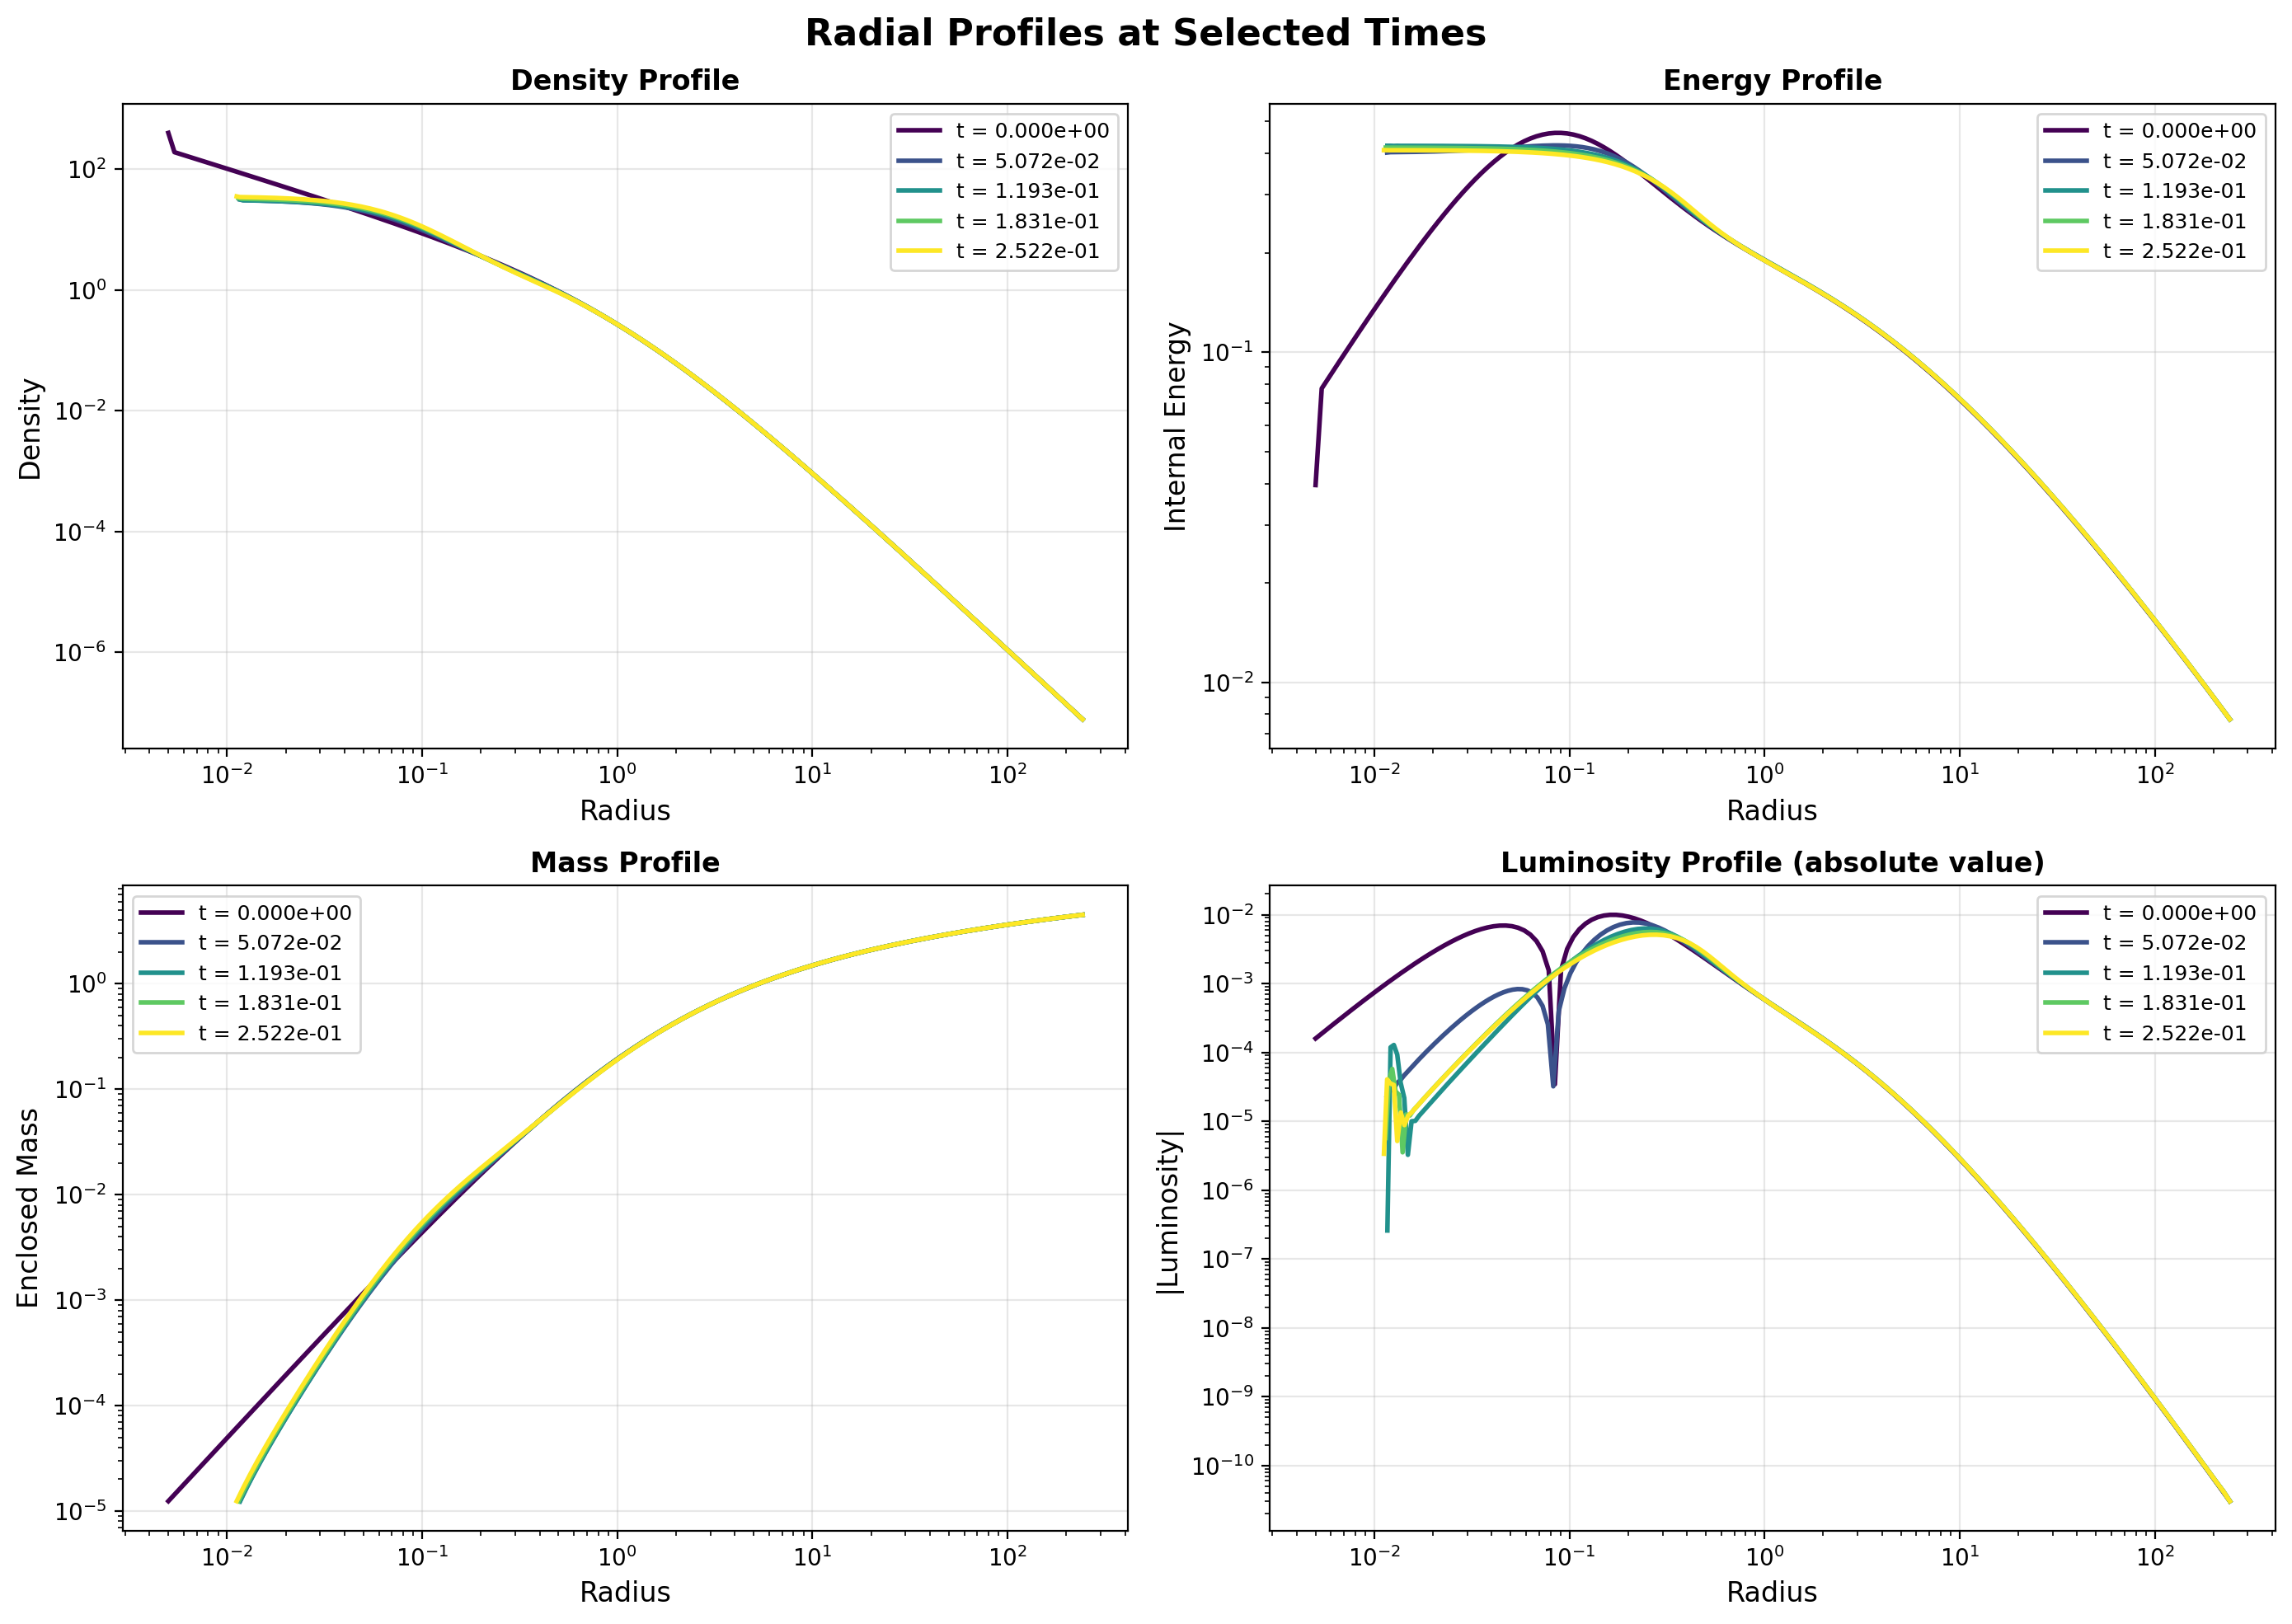

In [4]:
# Create a color map for the selected timesteps
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_indices)))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Radial Profiles at Selected Times', fontsize=16, fontweight='bold')

# Plot 1: Density vs Radius
ax = axes[0, 0]
for i, idx in enumerate(selected_indices):
    r = data['r_data'][idx]
    rho = data['rho_data'][idx]
    time = data['times'][idx]
    ax.loglog(r, rho, color=colors[i], linewidth=2, 
              label=f't = {time:.3e}')
ax.set_xlabel('Radius', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Density Profile', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 2: Internal Energy vs Radius
ax = axes[0, 1]
for i, idx in enumerate(selected_indices):
    r = data['r_data'][idx]
    u = data['u_data'][idx]
    time = data['times'][idx]
    ax.loglog(r, u, color=colors[i], linewidth=2,
              label=f't = {time:.3e}')
ax.set_xlabel('Radius', fontsize=12)
ax.set_ylabel('Internal Energy', fontsize=12)
ax.set_title('Energy Profile', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 3: Enclosed Mass vs Radius
ax = axes[1, 0]
for i, idx in enumerate(selected_indices):
    r = data['r_data'][idx]
    m = data['m_data'][idx]
    time = data['times'][idx]
    ax.loglog(r, m, color=colors[i], linewidth=2,
              label=f't = {time:.3e}')
ax.set_xlabel('Radius', fontsize=12)
ax.set_ylabel('Enclosed Mass', fontsize=12)
ax.set_title('Mass Profile', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 4: Luminosity vs Radius
ax = axes[1, 1]
for i, idx in enumerate(selected_indices):
    r = data['r_data'][idx]
    l = data['l_data'][idx]
    time = data['times'][idx]
    # Use absolute value for log scale (luminosity can be negative)
    ax.semilogy(r, np.abs(l), color=colors[i], linewidth=2,
                label=f't = {time:.3e}')
ax.set_xlabel('Radius', fontsize=12)
ax.set_ylabel('|Luminosity|', fontsize=12)
ax.set_title('Luminosity Profile (absolute value)', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xscale('log')

plt.tight_layout()
plt.show()

## 5. Time Evolution of Central Quantities

Track how central density, central energy, and innermost radius evolve over time.

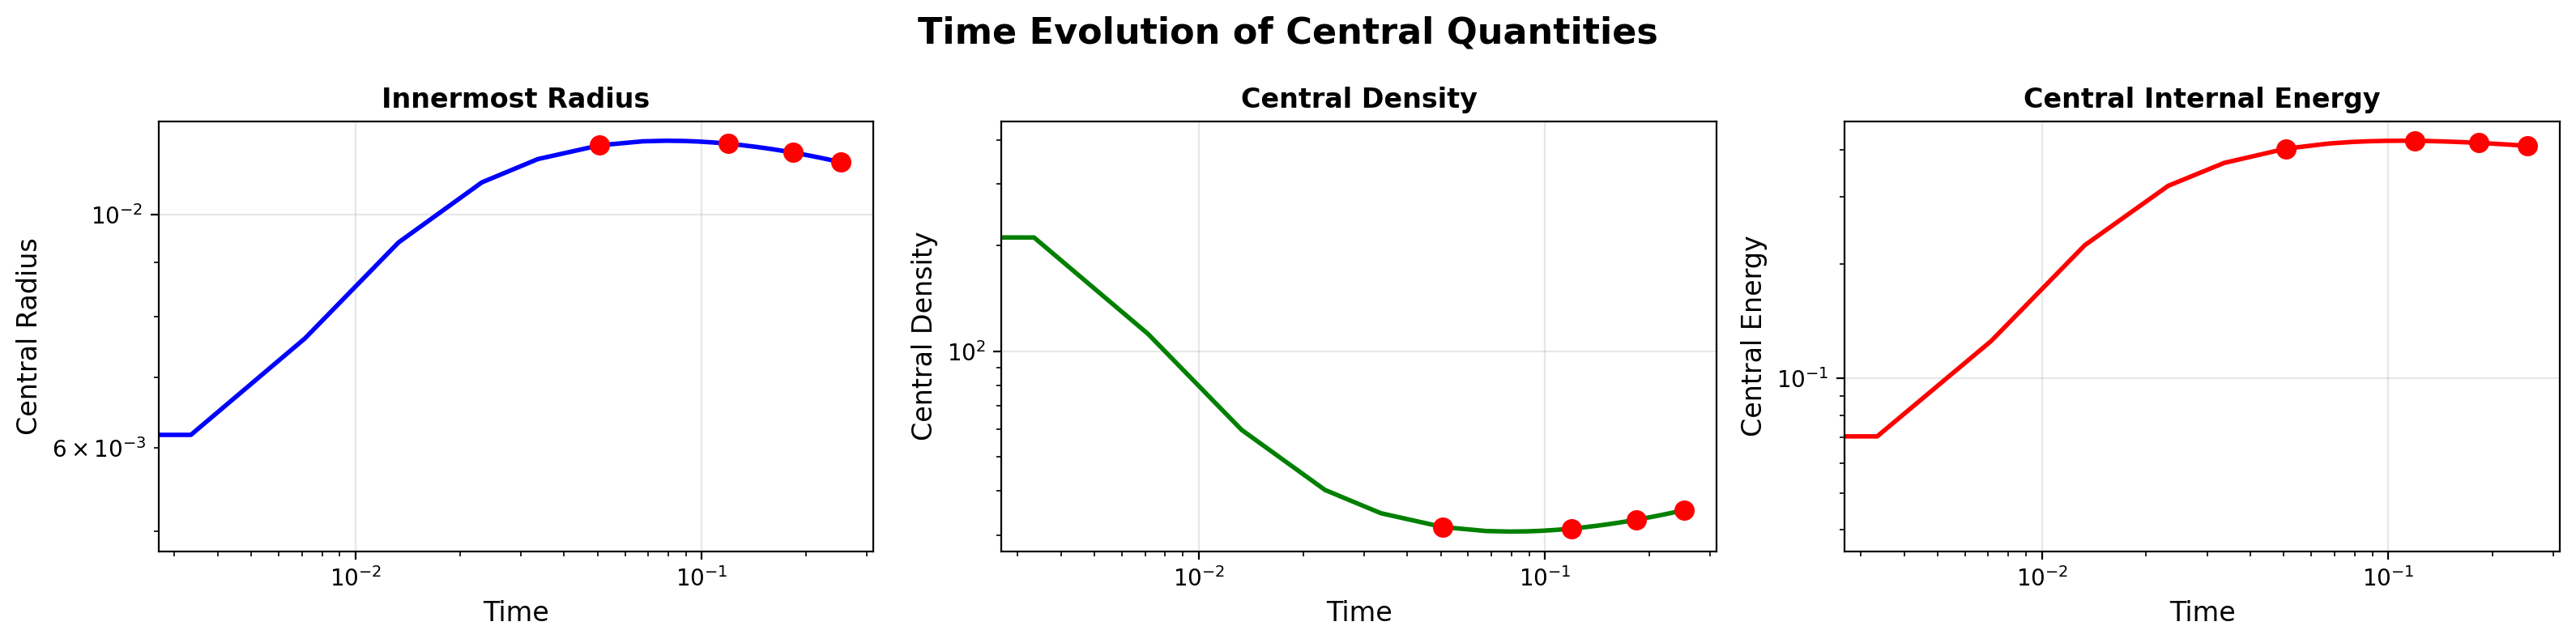


Red dots mark the 5 selected timesteps


In [5]:
# Extract central values (index 0) at all times
central_radius = np.array([r[0] for r in data['r_data']])
central_density = np.array([rho[0] for rho in data['rho_data']])
central_energy = np.array([u[0] for u in data['u_data']])
times = data['times']

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Time Evolution of Central Quantities', fontsize=16, fontweight='bold')

# Plot 1: Central Radius vs Time
ax = axes[0]
ax.plot(times, central_radius, 'b-', linewidth=2)
# Mark selected timesteps
for idx in selected_indices:
    ax.plot(times[idx], central_radius[idx], 'ro', markersize=8)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Central Radius', fontsize=12)
ax.set_title('Innermost Radius', fontweight='bold')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# Plot 2: Central Density vs Time
ax = axes[1]
ax.plot(times, central_density, 'g-', linewidth=2)
for idx in selected_indices:
    ax.plot(times[idx], central_density[idx], 'ro', markersize=8)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Central Density', fontsize=12)
ax.set_title('Central Density', fontweight='bold')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# Plot 3: Central Energy vs Time
ax = axes[2]
ax.plot(times, central_energy, 'r-', linewidth=2)
for idx in selected_indices:
    ax.plot(times[idx], central_energy[idx], 'ro', markersize=8)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Central Energy', fontsize=12)
ax.set_title('Central Internal Energy', fontweight='bold')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nRed dots mark the {len(selected_indices)} selected timesteps")

## 6. Summary Table

Display key quantities at the selected timesteps in a table format.

In [6]:
print(f"{'='*80}")
print(f"SUMMARY OF SELECTED TIMESTEPS")
print(f"{'='*80}")
print(f"{'Step':>8} {'Time':>12} {'r_center':>12} {'ρ_center':>12} {'u_center':>12}")
print(f"{'-'*80}")

for idx in selected_indices:
    step = data['steps'][idx]
    time = data['times'][idx]
    r_c = data['r_data'][idx][0]
    rho_c = data['rho_data'][idx][0]
    u_c = data['u_data'][idx][0]
    
    print(f"{step:8d} {time:12.6e} {r_c:12.6e} {rho_c:12.6e} {u_c:12.6e}")

print(f"{'='*80}")

SUMMARY OF SELECTED TIMESTEPS
    Step         Time     r_center     ρ_center     u_center
--------------------------------------------------------------------------------
       0 0.000000e+00 5.000000e-03 3.980075e+02 3.956491e-02
    6000 5.071868e-02 1.162989e-02 3.159256e+01 4.023623e-01
   12000 1.192866e-01 1.166857e-02 3.127906e+01 4.218290e-01
   18000 1.831360e-01 1.144625e-02 3.313665e+01 4.164625e-01
   24000 2.521564e-01 1.120593e-02 3.531375e+01 4.091622e-01


---

## Usage Notes

**To analyze a different run:**
1. Change the `output_file` variable in cell 5 to point to your output file
2. Adjust `N_timesteps` to show more or fewer snapshots
3. Re-run all cells

**Understanding the plots:**
- **Radial profiles**: Show spatial distribution at selected times
  - Earlier times are darker (purple), later times are lighter (yellow)
  - Log-log scales reveal power-law behavior
- **Time evolution**: Track central quantities over the full simulation
  - Red dots mark the selected timesteps shown in radial profiles
  - Shows core collapse or expansion behavior

**Physical interpretation:**
- Decreasing central radius + increasing density → core collapse
- Luminosity shows heat flux (negative = outward heat flow)
- Energy evolution reveals heating/cooling of the core